<a href="https://colab.research.google.com/github/britt-klose/AIHW7/blob/main/AIHW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task of this assignment is to create a MLPClassifier model that can as accurately as possible classify an asteroid as Hazardous or Non-Hazardous(binary classification).

Remember that MLP is MultiLayer Perceptron and includes:

*   1 input layer
*   1 or more hidden layers
*   1 output layer

Your analysis must include:
*   The overall classification accuracy on the dataset
*   The confusion matrix
*   The training/test accuracy plot
*   The loss curve
*   Different choice of hyperparameters (number of hidden layers, number of neurons per hidden layer) that lead to a more accurate model
*   Summarize the results of these experiments in a table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
import pandas as pd

asteroid = pd.read_csv('nasa_asteroid.csv')
X, y = asteroid.Name, asteroid.Hazardous
X= asteroid.drop(['Close Approach Date', 'Epoch Date Close Approach', 'Orbit Determination Date', 'Orbiting Body', 'Equinox'], axis='columns')

# Issue where scaler method not working. Reports an error that it can't convert
# date but all date columns should be removed above in drop function
#scaler = StandardScaler()
#data_scaled = scaler.fit_transform(asteroid)



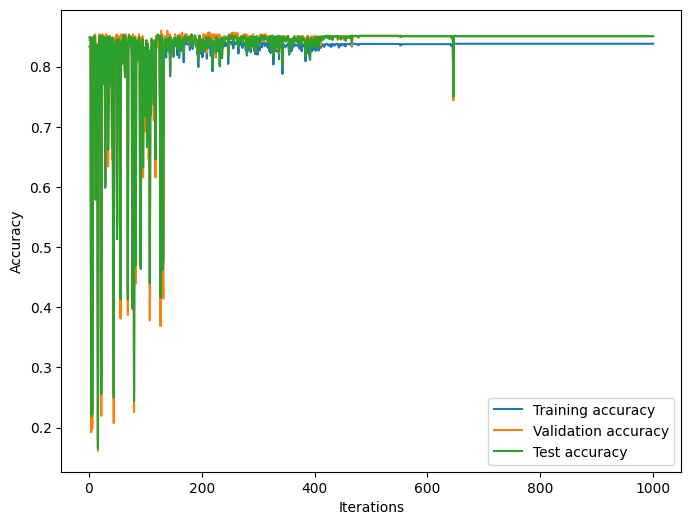

In [35]:
 # Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)


# Create an MLPClassifier without early stopping
# Experimenting with different #s of hidden layers and # of neurons

# mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 100, 100), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(300, 350, 400), max_iter=1000)
mlp = MLPClassifier(hidden_layer_sizes=(200, 250, 300), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(200, 200, 200), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(400, 400), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(200, 500), max_iter=1000)
# mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)


# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

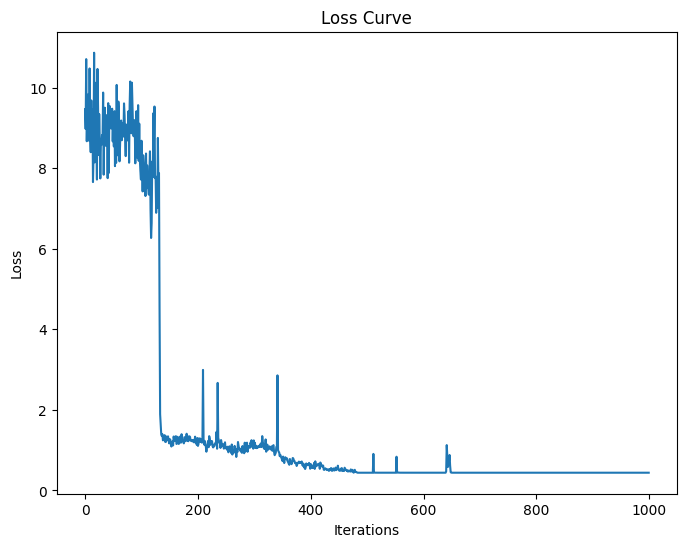

In [36]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [37]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")


#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Layer 0 - Weight matrix shape: (35, 200)
Layer 1 - Weight matrix shape: (200, 250)
Layer 2 - Weight matrix shape: (250, 300)
Layer 3 - Weight matrix shape: (300, 1)

Layer 0 - Intercept vector shape: (200,)
Layer 1 - Intercept vector shape: (250,)
Layer 2 - Intercept vector shape: (300,)
Layer 3 - Intercept vector shape: (1,)
Overall Training Accuracy: 0.8380758807588076
Overall Test Accuracy: 0.8507462686567164


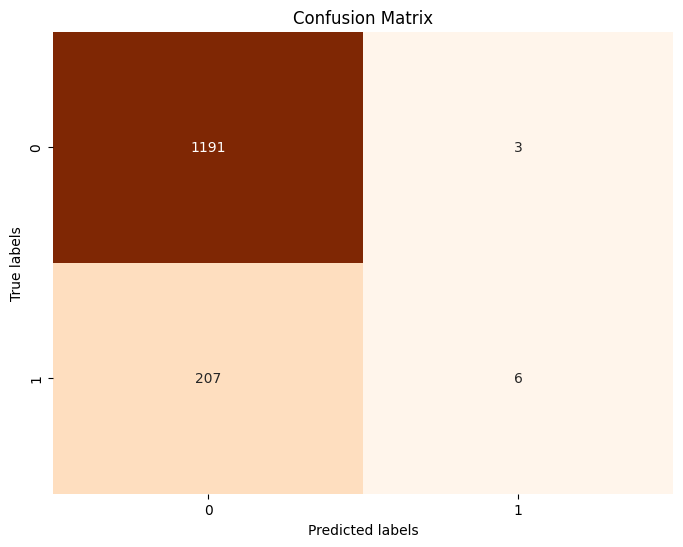

In [38]:
# @title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()